In [1]:
#Import the required packages
import pandas as pd
import seaborn as sns


In [2]:
#Read the dataset
ratings = pd.read_csv('/Users/SaravanaTK/Downloads/ratings_Electronics.csv', header=None, names=["UserID", "ProductID", "Ratings", "TimeStamp"])

In [3]:
#Print top 10 rows
ratings.head(10)

,UserID,ProductID,Ratings,TimeStamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
5,A1QGNMC6O1VW39,0511189877,5.0,1397433600
6,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600
7,A2TY0BTJOTENPG,0511189877,5.0,1395878400
8,A34ATBPOK6HCHY,0511189877,5.0,1395532800
9,A89DO69P0XZ27,0511189877,5.0,1395446400


In [4]:
#Print the dataframe metadata information
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
UserID       object
ProductID    object
Ratings      float64
TimeStamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [5]:
#Print the shape of the ratings dataframe. 7.8M+ rows.
ratings.shape

(7824482, 4)

In [6]:
#Describe the ratings data
ratings.describe()

,Ratings,TimeStamp
count,7.824482e+06,7.824482e+06
mean,4.012337e+00,1.338178e+09
std,1.380910e+00,6.900426e+07
min,1.000000e+00,9.127296e+08
25%,3.000000e+00,1.315354e+09
50%,5.000000e+00,1.361059e+09
75%,5.000000e+00,1.386115e+09
max,5.000000e+00,1.406074e+09


In [7]:
#Looks like there are no NAN values
ratings.isna().sum()

UserID       0
ProductID    0
Ratings      0
TimeStamp    0
dtype: int64

In [8]:
#Import matplotlib
import matplotlib.pyplot as py
%matplotlib inline

Text(3.209869432890254, 4108426.245, 'Mean: 4.01')

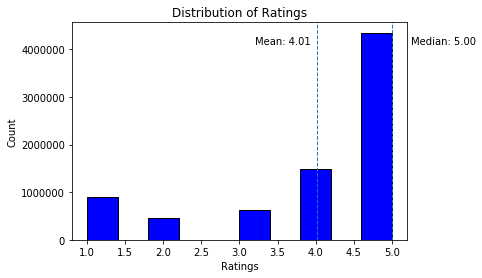

In [9]:
#Histogram for Ratings with Mean and Median value
py.hist(ratings['Ratings'], color = 'blue', edgecolor = 'black')

py.title('Distribution of Ratings')
py.xlabel('Ratings')
py.ylabel('Count')
py.axvline(ratings['Ratings'].median(), linestyle='dashed', linewidth = 1)
min_ylim, max_ylim = py.ylim()
py.text(ratings['Ratings'].median()*1.05, max_ylim*0.9, 'Median: {:.2f}'.format(ratings['Ratings'].median()))
py.axvline(ratings['Ratings'].mean(), linestyle='dashed', linewidth = 1)
py.text(ratings['Ratings'].mean()*0.8, max_ylim*0.9, 'Mean: {:.2f}'.format(ratings['Ratings'].mean()))

In [10]:
#Nearly 5.8M+ ratings with value 4.0 and 5.0
ratings.groupby('Ratings').count()

,UserID,ProductID,TimeStamp
Ratings,,,
1.0,901765,901765,901765
2.0,456322,456322,456322
3.0,633073,633073,633073
4.0,1485781,1485781,1485781
5.0,4347541,4347541,4347541


In [11]:
#ratings[['UserID','Ratings']].groupby('UserID').count()
filter = ratings.UserID.value_counts()

In [12]:
filter

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
                 ... 
A20P3RDQU7ERLF      1
A1OK3REQTPVHVJ      1
A1AP5HA4GVFBZS      1
AQYDEKH8H1LXM       1
A2IRGF8P6T9K9Q      1
Name: UserID, Length: 4201696, dtype: int64

In [13]:
#Convert to Pandas dataframe
filter = filter.to_frame()

In [14]:
filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4201696 entries, A5JLAU2ARJ0BO to A2IRGF8P6T9K9Q
Data columns (total 1 columns):
UserID    int64
dtypes: int64(1)
memory usage: 224.1+ MB


In [15]:
#Reset index
filter = filter.reset_index()

In [16]:
#Naming the columns
filter.columns = ['UserID','Count']

In [17]:
#Printing the dataframe
filter

,UserID,Count
0,A5JLAU2ARJ0BO,520
1,ADLVFFE4VBT8,501
2,A3OXHLG6DIBRW8,498
3,A6FIAB28IS79,431
4,A680RUE1FDO8B,406
...,...,...
4201691,A20P3RDQU7ERLF,1
4201692,A1OK3REQTPVHVJ,1
4201693,A1AP5HA4GVFBZS,1
4201694,AQYDEKH8H1LXM,1


In [18]:
#Considering the userids who have given ratings atleast 50 times
filter = filter[filter['Count'] > 50]

In [19]:
#Print the dataframe
filter['UserID']

0        A5JLAU2ARJ0BO
1         ADLVFFE4VBT8
2       A3OXHLG6DIBRW8
3         A6FIAB28IS79
4        A680RUE1FDO8B
             ...      
1461    A1XK4VP74IB9TQ
1462    A12ANFNOSMW5VD
1463    A1AKW788238PWQ
1464     ABMNX856X89CS
1465     AN2IZT80ZUNJN
Name: UserID, Length: 1466, dtype: object

In [20]:
ratings

,UserID,ProductID,Ratings,TimeStamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
...,...,...,...,...
7824477,A2YZI3C9MOHC0L,BT008UKTMW,5.0,1396569600
7824478,A322MDK0M89RHN,BT008UKTMW,5.0,1313366400
7824479,A1MH90R0ADMIK0,BT008UKTMW,4.0,1404172800
7824480,A10M2KEFPEQDHN,BT008UKTMW,4.0,1297555200


In [21]:
#Mergin the users and ratings dataframe
filtered_users = ratings.merge(filter,on=['UserID','UserID'])


In [22]:
filtered_users

,UserID,ProductID,Ratings,TimeStamp,Count
0,AT09WGFUM934H,0594481813,3.0,1377907200,110
1,AT09WGFUM934H,B00005105L,5.0,1377475200,110
2,AT09WGFUM934H,B000068O1M,5.0,1384905600,110
3,AT09WGFUM934H,B000068O34,5.0,1384732800,110
4,AT09WGFUM934H,B000068O4J,5.0,1387238400,110
...,...,...,...,...,...
122166,A328S9RN3U5M68,B00JGL37FO,5.0,1400976000,76
122167,A328S9RN3U5M68,B00K00FN3O,5.0,1400544000,76
122168,A328S9RN3U5M68,B00L21HC7A,5.0,1405123200,76
122169,A328S9RN3U5M68,B00L2442H0,5.0,1405123200,76


In [23]:
#Drop the count column
filtered_users.drop('Count', axis=1, inplace=True)


In [24]:
#Drop the timestamp
filtered_users.drop('TimeStamp', axis=1, inplace=True)

In [25]:
#filtered_users DataFrame contains only users who have given at least 50 reviews
filtered_users

,UserID,ProductID,Ratings
0,AT09WGFUM934H,0594481813,3.0
1,AT09WGFUM934H,B00005105L,5.0
2,AT09WGFUM934H,B000068O1M,5.0
3,AT09WGFUM934H,B000068O34,5.0
4,AT09WGFUM934H,B000068O4J,5.0
...,...,...,...
122166,A328S9RN3U5M68,B00JGL37FO,5.0
122167,A328S9RN3U5M68,B00K00FN3O,5.0
122168,A328S9RN3U5M68,B00L21HC7A,5.0
122169,A328S9RN3U5M68,B00L2442H0,5.0


In [26]:
#Import Surprise library
from surprise import Reader
from surprise.model_selection import train_test_split

In [27]:
#Scale from 1 to 5
reader = Reader(rating_scale=(1, 5))

In [28]:
#Loading to surprise dataset from Pandas dataframe
from surprise import Dataset
data = Dataset.load_from_df(filtered_users, reader)

In [29]:
data

In [30]:
#Train, test split in the 70% and 30% ratio
trainset, testset = train_test_split(data, test_size=0.3)


In [31]:
#Printing sample testset and count of testset
print(len(testset))
print(testset[0])

36652
('AWNJAY0M5UI70', 'B0036Q7MV0', 5.0)


In [32]:
#Print number of users and Items
print('Number of users: ', trainset.n_users, '\n')
print('Number of items: ', trainset.n_items, '\n')

Number of users:  1466 

Number of items:  37384 



In [33]:
#Import the surprise algorithms and accuracy
from surprise.prediction_algorithms import knns
from surprise.similarities import cosine, msd, pearson
from surprise import accuracy

In [34]:
sim_cos = {'name':'cosine', 'user_based':True}

In [35]:
#KNNBasic Model
basic = knns.KNNBasic(sim_options=sim_cos)
basic.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [36]:
basic.sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.99453584, ..., 0.        , 0.        ,
        0.93742527],
       [0.        , 0.99453584, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.93742527, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [37]:
predictions = basic.test(testset)

In [38]:
#Print RMSE
print(accuracy.rmse(predictions))

RMSE: 1.1035
1.103458547763697


In [39]:
#KNNBasic with sim_perason
sim_pearson = {'name':'pearson', 'user_based':True}
basic_pearson = knns.KNNBasic(sim_options=sim_pearson)
basic_pearson.fit(trainset)
predictions = basic_pearson.test(testset)
print(accuracy.rmse(predictions))

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0895
1.08947802805376


In [40]:
#KNN with Means seems to have the best RMSE
sim_pearson = {'name':'pearson', 'user_based':True}
knn_baseline = knns.KNNBaseline(sim_options=sim_pearson)
knn_baseline.fit(trainset)
predictions = knn_baseline.test(testset)
print(accuracy.rmse(predictions))

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0174
1.0173623865061212


In [45]:
#Function to build pandas dataframe with all the predictions
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)


,uid,iid,rui,est,details,Iu,Ui,err
0,AWNJAY0M5UI70,B0036Q7MV0,5.0,4.941775,"{'actual_k': 0, 'was_impossible': False}",80,26,0.058225
1,A3KCETSIJNOK56,B00E1MRYK2,4.0,3.968065,{'was_impossible': False},38,0,0.031935
2,AEL6CQNQXONBX,B00CQOYG30,5.0,4.280343,"{'actual_k': 0, 'was_impossible': False}",104,1,0.719657
3,A1BBYSMT9YCODI,B00D3F7D7M,4.0,4.010616,"{'actual_k': 1, 'was_impossible': False}",52,21,0.010616
4,A32NEDX6UVV8DE,B001BX5XDO,5.0,4.440087,{'was_impossible': False},52,0,0.559913
...,...,...,...,...,...,...,...,...
36647,A74UT8IQCM0I2,B00CEZBKTO,5.0,4.618871,"{'actual_k': 0, 'was_impossible': False}",37,3,0.381129
36648,A2L42QEWR77PKZ,B005PYWIWY,5.0,4.347185,{'was_impossible': False},76,0,0.652815
36649,A2Q7OJTVPIO2XH,B005HMKKH4,4.0,4.278156,"{'actual_k': 0, 'was_impossible': False}",36,55,0.278156
36650,A1U5NWJOYH2QQH,B001JTQUYG,5.0,3.970135,{'was_impossible': False},78,0,1.029865


In [48]:
#Best 5 predictions for the User Id AWNJAY0M5UI70 based on collaborative filtering
df[df['uid'] == 'AWNJAY0M5UI70'].sort_values(by='err')[:5]

,uid,iid,rui,est,details,Iu,Ui,err
0,AWNJAY0M5UI70,B0036Q7MV0,5.0,4.941775,"{'actual_k': 0, 'was_impossible': False}",80,26,0.058225
14581,AWNJAY0M5UI70,B006EWUOL8,5.0,4.757895,"{'actual_k': 0, 'was_impossible': False}",80,3,0.242105
8745,AWNJAY0M5UI70,B00A9NE84C,5.0,4.753818,"{'actual_k': 0, 'was_impossible': False}",80,10,0.246182
501,AWNJAY0M5UI70,B005HMKKH4,5.0,4.712545,"{'actual_k': 0, 'was_impossible': False}",80,55,0.287455
34334,AWNJAY0M5UI70,B003OBXHPC,5.0,4.683735,"{'actual_k': 0, 'was_impossible': False}",80,3,0.316265


In [50]:
#Popularity based recommendation
popularity_filtered_users = ratings.merge(filter,on=['UserID','UserID'])

In [51]:
#Print the dataframe
popularity_filtered_users

,UserID,ProductID,Ratings,TimeStamp,Count
0,AT09WGFUM934H,0594481813,3.0,1377907200,110
1,AT09WGFUM934H,B00005105L,5.0,1377475200,110
2,AT09WGFUM934H,B000068O1M,5.0,1384905600,110
3,AT09WGFUM934H,B000068O34,5.0,1384732800,110
4,AT09WGFUM934H,B000068O4J,5.0,1387238400,110
...,...,...,...,...,...
122166,A328S9RN3U5M68,B00JGL37FO,5.0,1400976000,76
122167,A328S9RN3U5M68,B00K00FN3O,5.0,1400544000,76
122168,A328S9RN3U5M68,B00L21HC7A,5.0,1405123200,76
122169,A328S9RN3U5M68,B00L2442H0,5.0,1405123200,76


In [53]:
#Drop the timestamp
popularity_filtered_users.drop('TimeStamp', axis=1, inplace=True)

In [61]:
#Print the top 5 Product IDs which have been rated 5 for most number of times.
popularity_filtered_users[['ProductID','Ratings','Count']].sort_values(['Ratings', 'Count'], ascending=False)[:5]

,ProductID,Ratings,Count
1330,B00003006R,5.0,520
1332,B00004S9AK,5.0,520
1335,B00004TS16,5.0,520
1340,B00004Z5L8,5.0,520
1341,B00004Z5M1,5.0,520


The recommendation system can be a combination of both Collaborative filtering and Popularity based 
If 10 recommentations are given to a particular user then 5 recommendations can be based on Collaborative filtering and remaining 5 recommendations can be popularity based.